# Importing Necessary Frameworks

In [1]:
import numpy as np    # Importing the NumPy library and assigning it an alias 'np'
import pandas as pd   # Importing the Pandas library and assigning it an alias 'pd'
import matplotlib.pyplot as plt   # Importing the Matplotlib library and assigning it an alias 'plt'

In [2]:
# Import the HTML class from the IPython.display module
from IPython.display import HTML

# Define a function called pretty_print_df that takes in a pandas value_counts_ object as an input parameter
def pretty_print_df(value_counts_): 
  "Quick function to display value counts more nicely"
  
  # Convert the input value_counts_ object into a pandas DataFrame using the DataFrame() constructor
  # and pass it to the to_html() method to create an HTML table as a string
  html_table_string = pd.DataFrame(value_counts_).to_html()
  
  # Pass the HTML table string to the HTML class to create an HTML object
  html_object = HTML(html_table_string)
  
  # Display the HTML object in the notebook using the display() function
  display(html_object)


# Loading the Dataset

In [3]:
df = pd.read_csv("../../DataSet/OPTION2_joined_coursework_dataset_banking_final (1).csv")

# Exploratory Data Analysis (EDA) and Data Preprocessing

In [4]:
# Display the first few rows of a Pandas DataFrame
df.head()

,text,label,query_index
0,Can I automatically top-up when traveling?,top_up_queries_or_issues,526cd7f17526
1,What kind of fiat currency can I used for hold...,other,f3cf7343067e
2,I did not get the item I ordered. How should ...,other,9a19501c3a3c
3,Freeze my account it's been hacked.,needs_troubleshooting,d76b07db8cf8
4,is there a reason that my payment didnt go thr...,other,bd95ba09a18d


In [5]:
# Display the shape of a Pandas DataFrame
df.shape

(14195, 3)

In [6]:
# Display the column labels of a Pandas DataFrame
df.columns

Index(['text', 'label', 'query_index'], dtype='object')

In [7]:
# Check if there are any duplicated rows in a Pandas DataFrame
df.duplicated().any()

True

In [8]:
# Remove duplicated rows from a Pandas DataFrame
df = df.drop_duplicates()

In [9]:
df.shape

(13672, 3)

In [10]:
df['label'].value_counts()

other                       4814
needs_troubleshooting       4158
card_queries_or_issues      2496
top_up_queries_or_issues    1633
Other                         21
Card_queries_or_issues        11
Top_up_queries_or_issues      11
Needs_troubleshooting          7
Name: label, dtype: int64

In [11]:
# Convert the values in a Pandas DataFrame column to lowercase
df['label'] = df['label'].str.lower()

In [12]:
df['label'].value_counts()

other                       4835
needs_troubleshooting       4165
card_queries_or_issues      2507
top_up_queries_or_issues    1644
Name: label, dtype: int64

In [13]:
WorkingData = df.copy()

In [14]:
WorkingData.isnull().sum()

text             0
label          521
query_index      0
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer 

In [16]:
categorical_columns= ['label']

## 1. Imputer
imptr_cat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

## 2. Fit the imputer object to the feature matrix (only for categorical features)
imptr_cat = imptr_cat.fit(WorkingData[categorical_columns])

## 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
WorkingData[categorical_columns] = imptr_cat.transform(WorkingData[categorical_columns])  

In [17]:
WorkingData.isnull().sum()

text           0
label          0
query_index    0
dtype: int64

In [18]:
WorkingData['label'].value_counts()

other                       5356
needs_troubleshooting       4165
card_queries_or_issues      2507
top_up_queries_or_issues    1644
Name: label, dtype: int64

Categories and Number of Occurrences for 'label':


,label
other,5356
needs_troubleshooting,4165
card_queries_or_issues,2507
top_up_queries_or_issues,1644


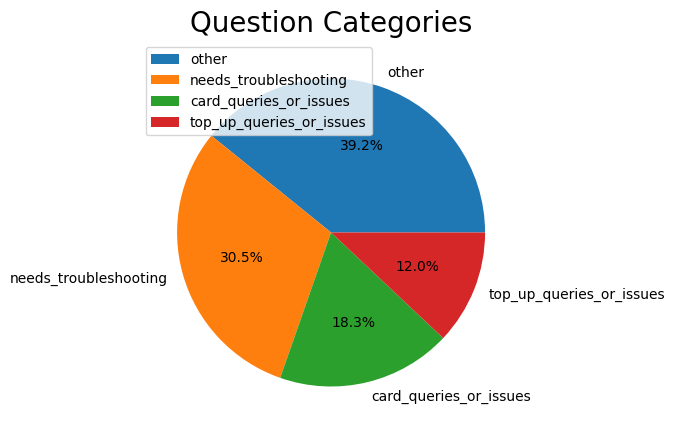

In [19]:
# Define a list of categorical columns
categorical_columns = ['label']

# Iterate over each categorical column
for col in categorical_columns:
    # Display the categories and number of occurrences in the column
    print(f"Categories and Number of Occurrences for '{col}':")
    pretty_print_df(WorkingData[col].value_counts())
    print()
    
    # Create a pie chart to visualize the distribution of values in the column
    plt.figure(figsize=(5, 5))
    values = WorkingData[col].value_counts()
    labels = values.index.tolist()
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title('Question Categories', fontsize=20)
    plt.legend(loc=2)
    plt.show()

In [20]:
# Remove a column from a Pandas DataFrame
del WorkingData['query_index']


In [21]:
WorkingData.shape

(13672, 2)

<AxesSubplot: title={'center': 'Count of number of labels'}>

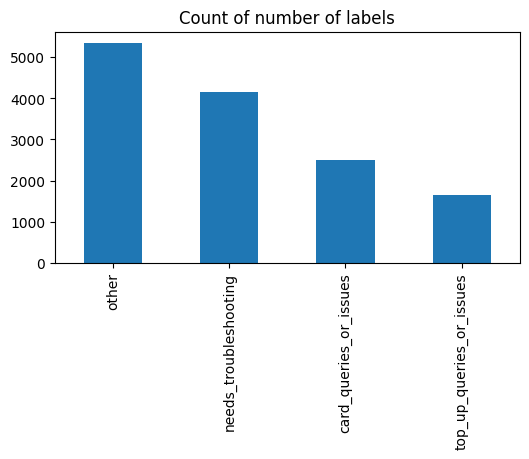

In [22]:
WorkingData['label'].value_counts().plot(kind='bar', title="Count of number of labels", figsize = (6,3))

# Data Cleaning in Text Column

In [23]:
WorkingData_2 = WorkingData.copy()

In [24]:
import re ## Regular Expression
import nltk ## Natural Language Took Kit

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sabbo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
# Import a list of stopwords from the NLTK library
from nltk.corpus import stopwords

In [27]:
# Get the list of English stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
sw = set(stopwords.words('english'))

In [29]:
# Import the Porter stemming algorithm from the NLTK library
from nltk.stem.porter import PorterStemmer

# Create a new instance of the Porter stemming algorithm
ps = PorterStemmer()

In [30]:
WorkingData_2["text"][10000]

"I got mugged yesterday and they took everything. I can't use the app, so I need some help."

In [31]:
# Import the Porter stemming algorithm from the NLTK library
from nltk.stem.porter import PorterStemmer

# Create a new instance of the Porter stemming algorithm
ps = PorterStemmer()

# Define a function to clean a sample of text
def clean_text(sample):
  # Convert the text to lowercase
  sample = sample.lower()

  # Remove non-alphabetic characters and replace with spaces
  sample = re.sub("[^a-zA-Z]+"," ", sample)

  # Split the text into individual words
  sample = sample.split()

  # Apply stemming to each word and remove stopwords
  sample = [ps.stem(s) for s in sample if s not in sw]

  # Join the stemmed words back into a single string
  sample = " ".join(sample)

  # Return the cleaned text sample
  return sample


This code defines a function called 'clean_text()' that takes a single argument 'sample', which represents a string of text to be cleaned. The function first converts the text to lowercase using the 'lower()' method, then removes any non-alphabetic characters and replaces them with spaces using the 're.sub()' function. It then splits the cleaned text into individual words using the 'split()' method, and applies stemming to each word using the 'PorterStemmer' instance created earlier. It also removes any stopwords from the text by checking if each word is in the list of stopwords 'sw'. Finally, the function joins the stemmed words back into a single string using the 'join()' method and returns the cleaned text sample. This function can be used to preprocess text data in order to prepare it for NLP tasks like text classification and sentiment analysis.

In [32]:
clean_text(WorkingData_2["text"][10000]) # Example for the fucntion

'got mug yesterday took everyth use app need help'

In [33]:
# Apply the fucntion to dataset text column
WorkingData_2['processed_text'] = WorkingData_2['text'].apply(clean_text)

In [34]:
# Extract the 'processed_text' column from the WorkingData_2 DataFrame
processed_text = WorkingData_2['processed_text']

# Convert the processed text column to a NumPy array
corpus = processed_text.values

In [35]:
corpus

array(['automat top travel', 'kind fiat currenc use hold exchang',
       'get item order go cancel order payment pleas help', ...,
       'pleas tell card payment go tri buy someth onlin put card payment take come back later',
       'rate currenc exchang wrong bought someth', 'abl track card sent'],
      dtype=object)

"corpus" is a variable containing a NumPy array of preprocessed text data. The exact contents of the "corpus" array depend on the data that was loaded into the "WorkingData_2" DataFrame and how it was preprocessed. Without more information about the data and preprocessing steps, it is not possible to determine the contents of the "corpus" array.

# Data Transformation

In [36]:
# Import the CountVectorizer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Create a new instance of the CountVectorizer class with max_features set to 1600
cv = CountVectorizer(max_features=1646)

In [37]:
X = cv.fit_transform(corpus).toarray()

In [38]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
# tfidf = TfidfTransformer()

In [40]:
# X = tfidf.fit_transform(X)

In [41]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
X.shape

(13672, 1646)

In [43]:
WorkingData_2.head()

,text,label,processed_text
0,Can I automatically top-up when traveling?,top_up_queries_or_issues,automat top travel
1,What kind of fiat currency can I used for hold...,other,kind fiat currenc use hold exchang
2,I did not get the item I ordered. How should ...,other,get item order go cancel order payment pleas help
3,Freeze my account it's been hacked.,needs_troubleshooting,freez account hack
4,is there a reason that my payment didnt go thr...,other,reason payment didnt go


In [44]:
Y = pd.DataFrame(WorkingData_2,columns=['label'])

In [45]:
Y

,label
0,top_up_queries_or_issues
1,other
2,other
3,needs_troubleshooting
4,other
...,...
14190,card_queries_or_issues
14191,card_queries_or_issues
14192,card_queries_or_issues
14193,needs_troubleshooting


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [50]:
ct = ColumnTransformer(
    [
        (
            "onehot_categorical", # --> name of the transformation
            OneHotEncoder(), # --> main function to apply 
            ['label'], #-->columns to apply it to (we can give more than one column at once!)
        ),
    ],
    remainder="passthrough", #--> what to do with the non-transformed columns. passthrough=keep them
    verbose_feature_names_out=False #--> this keeps columns names simple. Try what happens if you set it as True
)


In [51]:
y_encoded_array= ct.fit_transform(Y) 

In [52]:
y_encoded_array.shape

(13672, 4)

In [53]:
y_encoded_array = y_encoded_array.toarray()

In [54]:
y_encoded_array.shape

(13672, 4)

In [55]:
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import numpy as np

def create_model_single_hidden(n_hidden=20, num_of_input_features= X_train.shape[1]):
    model = models.Sequential()
    model.add(layers.Input(shape=(num_of_input_features))) 
    model.add(layers.Dense(n_hidden, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    return model

def model_compile_and_training(model, X_train, y_train, #test_dataset_no_nans, test_encoded_labels,
                               optimizer_name = 'Adam', learning_rate = 0.01,
                               n_epochs= 50, batch_size=256,
                               validation_split= 0.2,):
    if optimizer_name== 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate= learning_rate)

    # as metric we choose the accuracy: the total number of correct predictions made
    model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

    #print(model.summary())

    # Training
    validation_split = 0.2  #Fraction of the training data to be used as validation data.
    history = model.fit(X_train, 
                    y_train, 
                    epochs=n_epochs, 
                    batch_size=batch_size, 
                    validation_split= validation_split,
                    verbose=0, #this avoids getting lots of output
                    class_weight=class_weights
                    )
    return model, history



NameError: name 'X_train' is not defined

In [ ]:
# Generate some random data for demonstration purposes
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded_array, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

y_integers = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight(class_weight= "balanced", 
    classes=np.unique(y_integers), y=y_integers)
class_weights = dict(zip(np.unique(y_integers), class_weights))


l_rates = [0.00001, 0.0001, 0.001, 0.01, 0.05]
final_accuracies_train = []
final_accuracies_val = []
final_accuracies_test = []
for i, l_rate in enumerate(l_rates):
    model = create_model_single_hidden()

    model, history = model_compile_and_training(model, X_train, y_train, 
                               learning_rate= l_rate)
    
    final_accuracies_train.append(history.history['accuracy'][-1])
    final_accuracies_val.append(history.history['val_accuracy'][-1])
    # predict the test labels and save the accuracy score
    test_probabilities = model.predict(X_test)
    test_predictions = np.argmax(test_probabilities, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
    final_accuracies_test.append(accuracy_score(y_test_labels, test_predictions))
